# EDA and Cleaning
---


#### Exploratory Data Analysis
- Read the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

#### Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

#### Data Pre-processing
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, Ridge, RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [ ]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(2051, 81)
(878, 80)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

## Data Cleaning
1. During basic EDA, you identify many missing values in a column/feature.
2. You consult the data dictionary and use domain knowledge to decide _what_ is meant by this missing feature.
3. You impute a reasonable value for the missing value.
4. You plot the distribution of your feature.
5. You realize what you imputed has negatively impacted your data quality.
6. You cycle back, re-load your clean data, re-think your approach, and find a better solution.

## 1. lowercase columns

In [ ]:
# Lowercaseifying
def lowercaseify(df):
	# dict lowercase columns
	to_map = dict(zip(df.columns, [column.lower().replace(" ", "_") for column in df.columns]))

	# rename columns
	df.rename(columns = to_map, inplace = True)

In [ ]:
lowercaseify(train)
print(train.columns[:5])
lowercaseify(test)
print(test.columns[:5])

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')
Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')


## 2. remove outliers

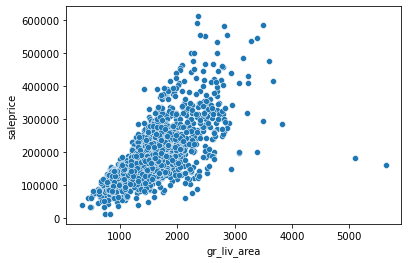

In [ ]:
sns.scatterplot(x=train.gr_liv_area, y=train.saleprice);

In [ ]:
#train.loc[train.gr_liv_area >= 4000,:] #960, 1885
train.drop(index=[960,1885], inplace=True)

In [ ]:
test.loc[test.gr_liv_area >= 4000,:] #170, 463
test.drop(index=[170, 463], inplace=True)

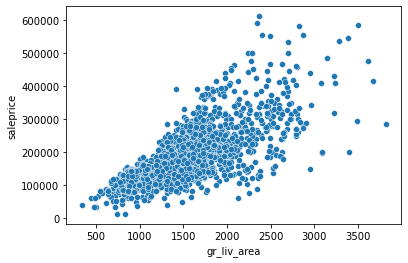

In [ ]:
sns.scatterplot(x=train.gr_liv_area, y=train.saleprice);

## 3. remove missing values

### floats

In [ ]:
train.select_dtypes(include='float64').isna().sum()

lot_frontage      330
mas_vnr_area       22
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_yr_blt     114
garage_cars         1
garage_area         1
dtype: int64

In [ ]:
floats = train.select_dtypes(include='float64').columns
floats

Index(['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath',
       'garage_yr_blt', 'garage_cars', 'garage_area'],
      dtype='object')

In [ ]:
si_mean = SimpleImputer(strategy='mean')
train[['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'garage_yr_blt', 'garage_area']] = si_mean.fit_transform(train[['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'garage_yr_blt', 'garage_area']])


In [ ]:
test[floats] = si_mean.fit_transform(test[floats])
test.select_dtypes(include='float64').isna().sum()

lot_frontage      0
mas_vnr_area      0
bsmtfin_sf_1      0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
bsmt_full_bath    0
bsmt_half_bath    0
garage_yr_blt     0
garage_cars       0
garage_area       0
dtype: int64

In [ ]:
si_0 = SimpleImputer(strategy='constant', fill_value=0)
train[['bsmt_full_bath', 'bsmt_half_bath', 'garage_cars']] = si_0.fit_transform(train[['bsmt_full_bath', 'bsmt_half_bath', 'garage_cars']])
      

### integers

In [ ]:
train.select_dtypes(include='int64').isna().sum()

id                 0
pid                0
ms_subclass        0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
dtype: int64

### objects

In [ ]:
train.select_dtypes(include='object').isna().sum()

ms_zoning            0
street               0
alley             1909
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        22
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_type_2      56
heating              0
heating_qc           0
central_air          0
electrical           0
kitchen_qual         0
functional           0
fireplace_qu      1000
garage_type        113
garage_finish      114
garage_qual        114
garage_cond        114
paved_drive          0
pool_qc           2041
fence             1649
misc_feature      1985
sale_type            0
dtype: int64

In [ ]:
train.drop(columns='pool_qc', inplace=True)

In [ ]:
test.drop(columns='pool_qc', inplace=True)

In [ ]:
objects = train.select_dtypes(include='object').columns
objects

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'fence', 'misc_feature', 'sale_type'],
      dtype='object')

In [ ]:
si_na = SimpleImputer(strategy='constant', fill_value='NA')
train[objects] = si_na.fit_transform(train[objects])

In [ ]:
test[objects] = si_na.fit(test[objects])

In [ ]:
train.select_dtypes(include='object').isna().sum()

ms_zoning         0
street            0
alley             0
lot_shape         0
land_contour      0
utilities         0
lot_config        0
land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
exter_qual        0
exter_cond        0
foundation        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
heating           0
heating_qc        0
central_air       0
electrical        0
kitchen_qual      0
functional        0
fireplace_qu      0
garage_type       0
garage_finish     0
garage_qual       0
garage_cond       0
paved_drive       0
fence             0
misc_feature      0
sale_type         0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   pid              2049 non-null   int64  
 2   ms_subclass      2049 non-null   int64  
 3   ms_zoning        2049 non-null   object 
 4   lot_frontage     2049 non-null   float64
 5   lot_area         2049 non-null   int64  
 6   street           2049 non-null   object 
 7   alley            2049 non-null   object 
 8   lot_shape        2049 non-null   object 
 9   land_contour     2049 non-null   object 
 10  utilities        2049 non-null   object 
 11  lot_config       2049 non-null   object 
 12  land_slope       2049 non-null   object 
 13  neighborhood     2049 non-null   object 
 14  condition_1      2049 non-null   object 
 15  condition_2      2049 non-null   object 
 16  bldg_type        2049 non-null   object 
 17  house_style   

## 4. exploratory data visualizations 

In [ ]:
train.saleprice.describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

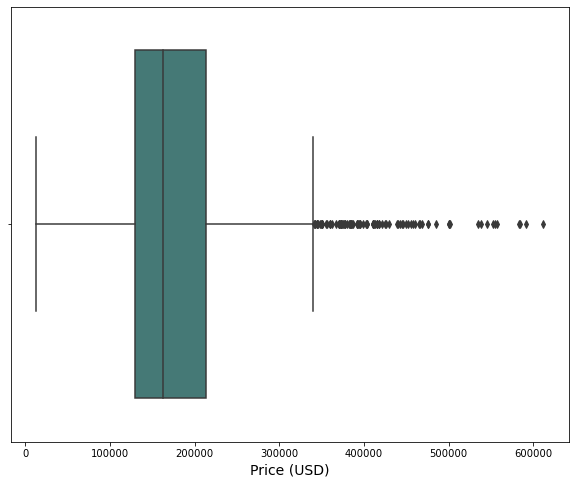

In [ ]:
plt.subplots(figsize=(10,8))
#Generate Sale Price Boxplot
boxplot_saleprice = sns.boxplot(data=train, x='saleprice',o)

#Set titles
boxplot_saleprice.set_xlabel("Price (USD)", fontsize=14);

A majority of home seem to be between 100k to a little over 200k. What condition are the lots are nearly 0? What about the lots that are in the top 25th percentile? Based on the price, what condition will the home be in?

In [ ]:
train.loc[train['neighborhood'] == 'StoneBr', 'saleprice'].describe()

count        38.000000
mean     329675.736842
std      128597.738212
min      130000.000000
25%      218125.000000
50%      322450.000000
75%      427085.000000
max      591587.000000
Name: saleprice, dtype: float64

### continuous variables

In [ ]:
def plot_box(df, col_name, axis):
    print(df[col_name].describe())
    sns.boxplot(data=df, x=col_name, ax=axis, palette=sns.diverging_palette(185, 16))
    axis.set_title(f"Distribution of {col_name}")
    axis.set_xlabel(f"{col_name}")

def plot_scatter(df, col_name, axis):
    sns.scatterplot(data=df, x=col_name, y='saleprice', ax=axis, palette=sns.diverging_palette(185, 16))
    axis.set_title(f"Distribution of Sale Price based on {col_name}")
    axis.set_xlabel(f"{col_name}")
    axis.set_ylabel("Sale Price");
    
def plot_bar(df, col_name, axis):
    sns.barplot(data=train, x=col_name, y='saleprice', palette=sns.diverging_palette(185, 16), ax=axis)
    # Set right titles and labels
    axis.set_title(f"Distribution of Sale Price based on {col_name}")
    axis.set_xlabel(f"{col_name}")
    axis.set_ylabel("Sale Price");

count      2049.000000
mean      10024.677892
std        6608.511749
min        1300.000000
25%        7500.000000
50%        9405.000000
75%       11500.000000
max      159000.000000
Name: lot_area, dtype: float64


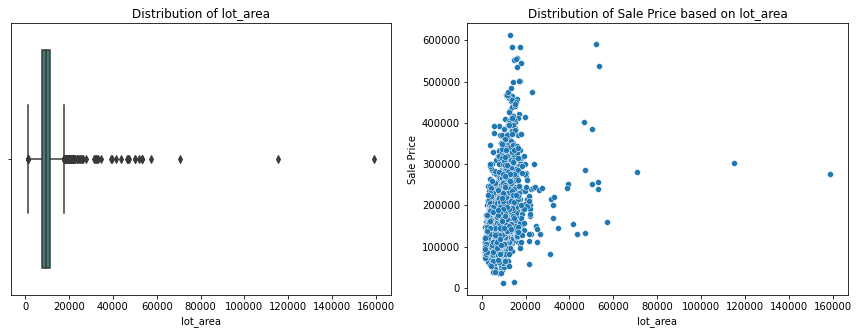

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot_box(train, 'lot_area', ax[0])
plot_scatter(train, 'lot_area', ax[1])

There appear to be high value outliers in the `lot_area` that are slightly above the 75th percentie yet lower than the max `sale_price`. The lot_area varies in saleprice, but has bias for under 20k sq ft. 

count    2049.000000
mean     1495.553441
std       485.783577
min       334.000000
25%      1128.000000
50%      1444.000000
75%      1728.000000
max      3820.000000
Name: gr_liv_area, dtype: float64


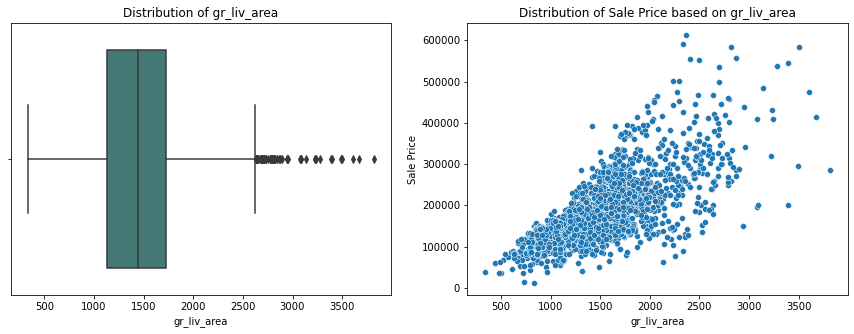

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_box(train, 'gr_liv_area', ax[0])
plot_scatter(train, 'gr_liv_area', ax[1])

There appears to be strong positive relationship between `gr_liv_area` and `saleprice`. The larger the general iving area, the higher the saleprice. Around 2k sq ft, there seems to be more variance in price. How does the quality and condition of a home with more than 2k sqft of `gr_liv_area` relate to its price? [feature engineering]To understand wha tthe lots look like (ie yard space) what is the average difference between `gr_liv_area` and `lot_area`?

count    2049.000000
mean     1053.549805
std       426.179349
min         0.000000
25%       793.000000
50%       994.000000
75%      1317.000000
max      3206.000000
Name: total_bsmt_sf, dtype: float64


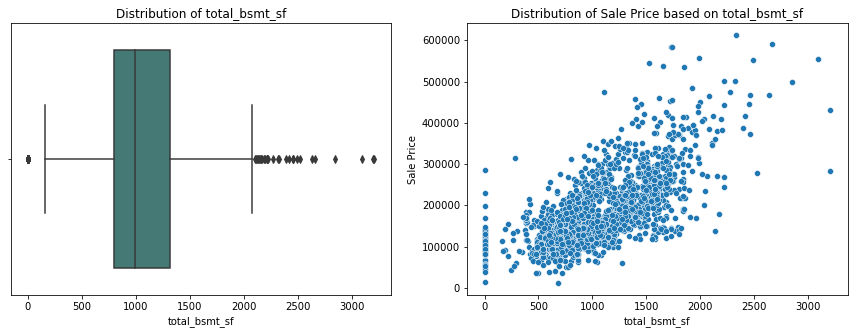

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot_box(train, 'total_bsmt_sf', ax[0])
plot_scatter(train, 'total_bsmt_sf', ax[1])

There seems to be a positive relationship between `total_bsmt_sf` and `saleprice` which may indicate that the larger the basement the higher the price. However, there is greater variance than general living area. If the hue='bsmt_cond', what does that tell us about the pricing of the home based on the basement?

In [ ]:
train

count    2049.000000
mean       47.224500
std        65.857797
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       547.000000
Name: open_porch_sf, dtype: float64


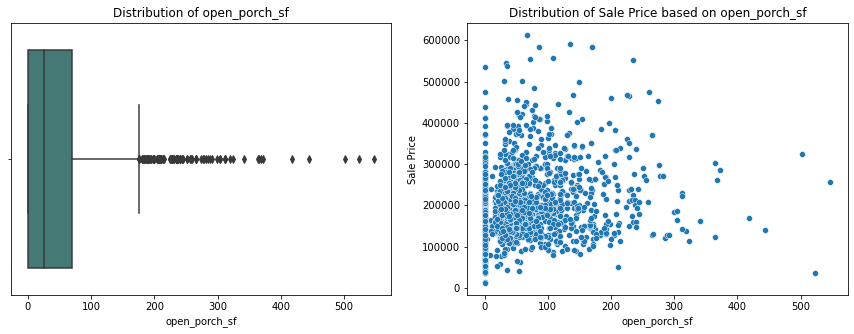

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_box(train, 'open_porch_sf', ax[0])
plot_scatter(train, 'open_porch_sf', ax[1])

There seems to be a lot of high value outliers that are homes with midrange `saleprice` with a large `open_porch_sf`. What year were these homes built? What condition are they in now?

### discrete variables

In [ ]:
train.loc[train['garage_cars'] == 5, 'saleprice'].mean()

203885.9512195122

In [ ]:
215374- 203885

11489

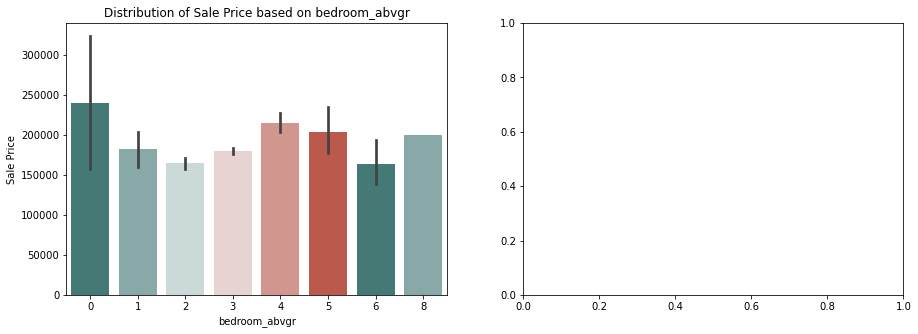

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'bedroom_abvgr', ax[0])

What type of homes have no bedrooms? and why is the highest priced one in this category?

[(0.23862542198859238, 0.5094633512194428, 0.49160510237158667),
 (0.5121103741043305, 0.6863878147215972, 0.6745335751857167),
 (0.7882660777055738, 0.8650400561876397, 0.8592484588671723),
 (0.9223327889610088, 0.8169049291501689, 0.803302399058982),
 (0.8640103485599254, 0.5545386101256675, 0.513540684113478),
 (0.8062519549712317, 0.2947096829679407, 0.22658130683669253)]

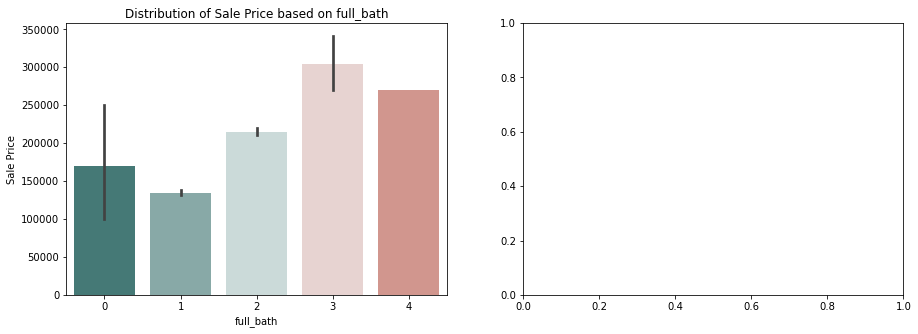

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'full_bath',ax[0])
sns.diverging_palette(185, 16)

The higher priced homes had 3 bathrooms. Home with no bathrooms had higher sale prices on average than homes with 1 bathroom. How did these compare?

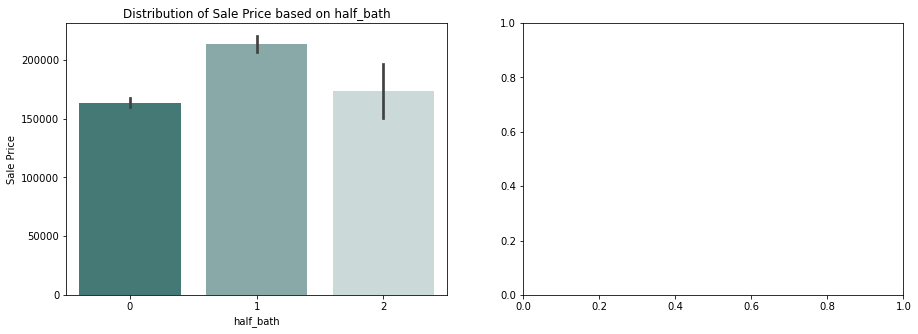

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'half_bath', ax[0])

It seems that all the homes with a `half_bath` were above 150,000k. What other features are common in this price range?

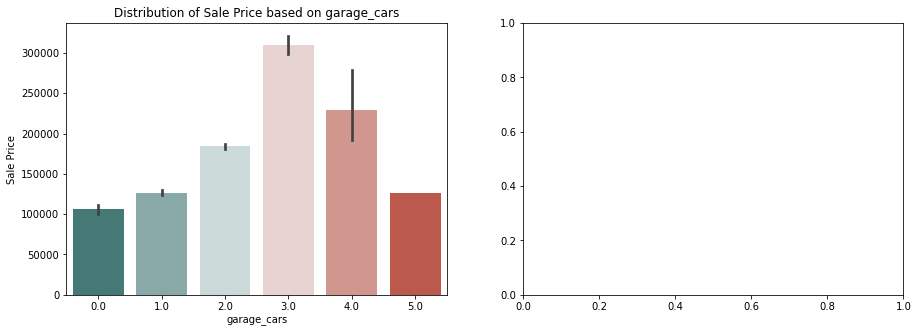

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'garage_cars', ax[0])

TUNING: do not impute with `train.bsmt_full_bath` mean

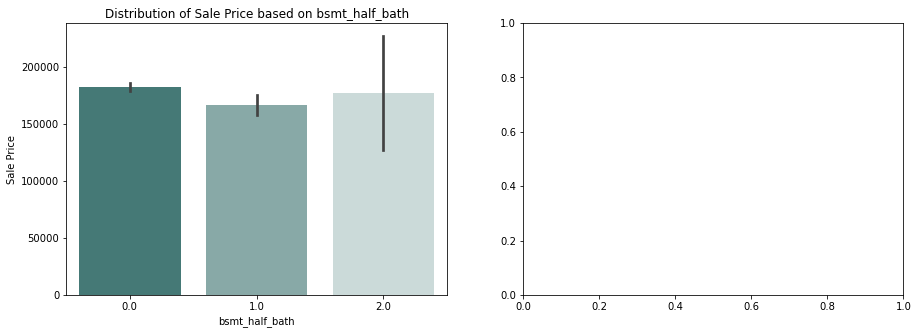

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'bsmt_half_bath', ax[0])

TUNING: do not impute with `train.bsmt_half_bath` mean

count    2049.000000
mean        6.428990
std         1.544572
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: totrms_abvgrd, dtype: float64


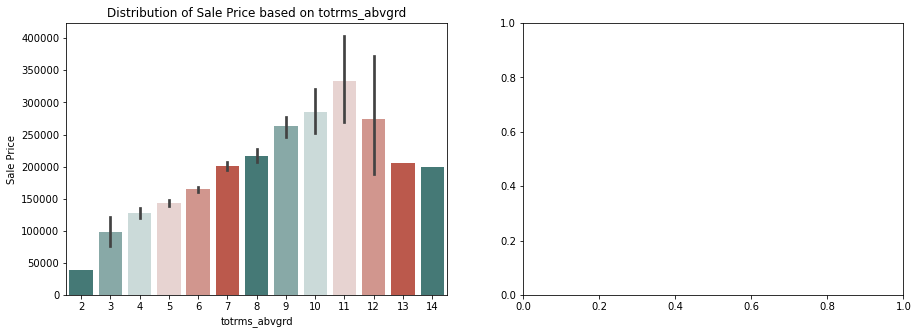

In [ ]:
print(train.totrms_abvgrd.describe())
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'totrms_abvgrd', ax[0])

The highest priced homes have more than 8 rooms. Observing std of 1 from mean 6, this indicates that +8 homes may be outliers.This distribution shows that finding this home in Ames may be difficult because there is less than 2.5% of the data (see std of 1 from mean 6). How many of the kitchen/bedroom/bath does the average home have versus a higher priced home?

count    2049.000000
mean        1.042948
std         0.209888
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: kitchen_abvgr, dtype: float64


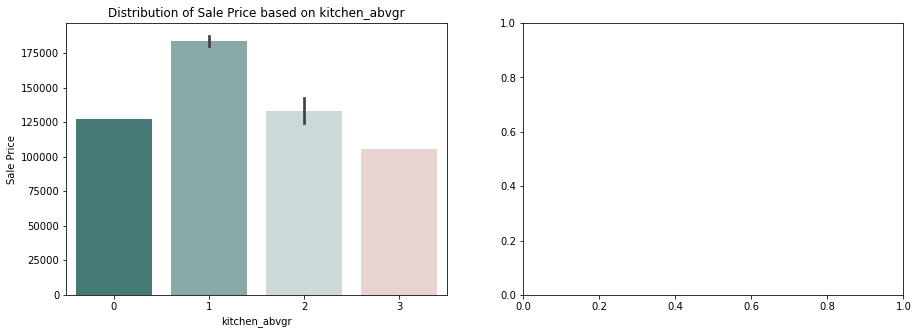

In [ ]:
print(train.kitchen_abvgr.describe())
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'kitchen_abvgr', ax[0])

It was surprising that homes with more than one kitchen had lower prices. Becuase of statistics, it is assumed that the saleprice based on kitchens is closer to the observed mean saleprice because a majority of the homes in the sample have 1 kitchen. What year were thehomes with 2 and 3 kitchens built? What does this say about lifestyle? What condition are these homes in?

In [ ]:
train.central_air.describe()

count     2049
unique       2
top          Y
freq      1908
Name: central_air, dtype: object

count    2049.000000
mean        1.775012
std         0.765236
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: garage_cars, dtype: float64


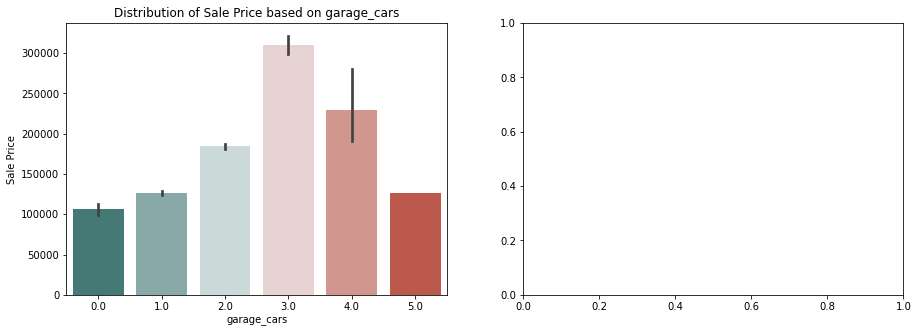

In [ ]:
print(train.garage_cars.describe())
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'garage_cars', ax[0])

TUNING: do not impute with `train.garage_cars` mean

### nominal variables

count    2049.000000
mean     1971.673499
std        30.171293
min      1872.000000
25%      1953.000000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64


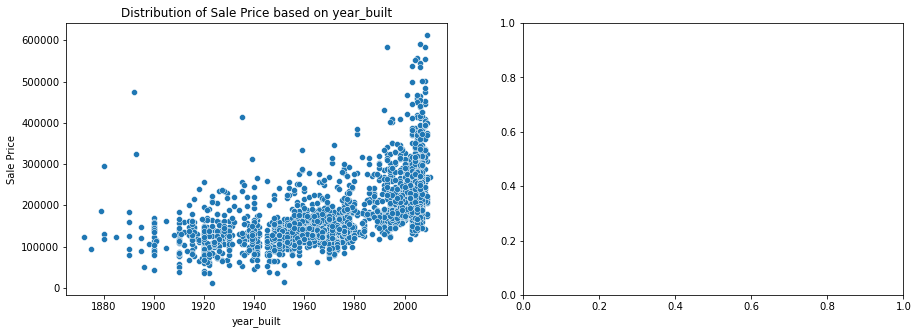

In [ ]:
print(train.year_built.describe())
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_scatter(train, 'year_built', ax[0])

Over 75% of the data is within a 50 year range. It appears that the newest the homes have the highest prices. However, the price of the newest homes has high variance. Is the variance for new homes due to condition or quality? What is the profile fo the home that was built before 1900 and was sold for 500k? When was it last remodeled?

<AxesSubplot:xlabel='year_remod/add', ylabel='saleprice'>

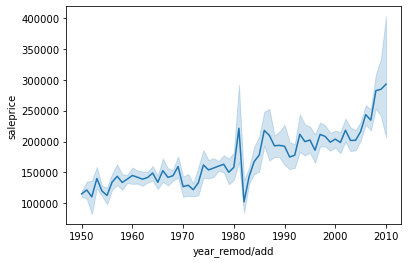

In [ ]:
sns.lineplot(data=train, x='year_remod/add', y='saleprice')

New remodels have higher prices. How does the overall condition relate to the remodel year?

count    2049.000000
mean        6.220595
std         2.742380
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: mo_sold, dtype: float64


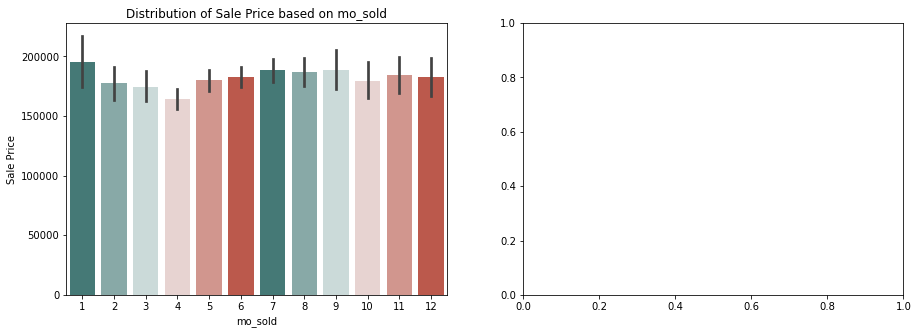

In [ ]:
print(train.mo_sold.describe())
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_bar(train, 'mo_sold', ax[0])

There isn't much variance in the month sold and sale price?

count    2049.000000
mean     2007.775988
std         1.312533
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yr_sold, dtype: float64


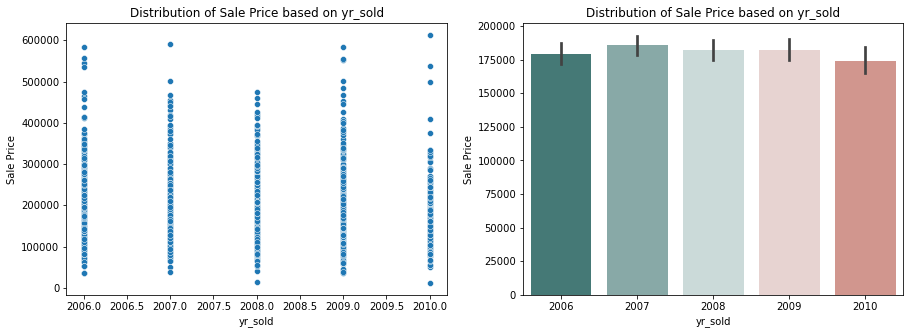

In [ ]:
print(train.yr_sold.describe())
fig, ax = plt.subplots(1,2, figsize=(15,5))

plot_scatter(train, 'yr_sold', ax[0])
plot_bar(train, 'yr_sold', ax[1]);

How does the data vary by yr_sold based on when the home was built? When the home was remodeled? The condition of the home?

In [ ]:
nwames = train.loc[train['neighborhood'] == 'NWAmes']

In [ ]:
plot_bar(nwames, x='', y='saleprkce')

## 5. Convert Datatypes

## 6. Export Clean data sets

In [ ]:
train.to_csv('../data/train_clean2.csv')

In [ ]:
test.to_csv('../data/test_clean2.csv')

In [ ]:
tr

NameError: name 'tr' is not defined